In [1]:
%matplotlib inline
# 주피터 내에서 

import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

try:
    from mglearn.datasets import load_extended_boston
except:
    import sys
    !{sys.executable} -m pip install mglearn
    # pip 를 통해 설치 
finally:
    from mglearn.datasets import load_extended_boston
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso



  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\74\cf\8d\04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [2]:
boston = load_boston()
# 딕셔너리 형태로 되어있음. 

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [8]:
model = LinearRegression()
# 모델을 정의

In [9]:
model.fit(X, y)
# 바로 학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [776]:
model.coef_[0]
# 현재 정의되어 있는 weight를 볼 수 있다.

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [10]:
model.coef_.reshape(-1)

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [11]:
model.intercept_
# weight zero. 상수항 

array([36.45948839])

In [12]:
model.coef_.reshape(-1)

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [13]:
for feature in zip(boston['feature_names'], model.coef_.reshape(-1)):
    print(feature)
print('intercept', model.intercept_)
# NOX가 가장 큰 영향을 미치는 것을 알 수 있다.

('CRIM', -0.10801135783679539)
('ZN', 0.04642045836687953)
('INDUS', 0.020558626367068917)
('CHAS', 2.6867338193448442)
('NOX', -17.766611228299986)
('RM', 3.8098652068092282)
('AGE', 0.0006922246403431768)
('DIS', -1.47556684560025)
('RAD', 0.30604947898516427)
('TAX', -0.012334593916574021)
('PTRATIO', -0.9527472317072921)
('B', 0.00931168327379375)
('LSTAT', -0.5247583778554881)
intercept [36.45948839]


In [14]:
model.score(X_train, y_train)

0.741060985671318

In [15]:
model.score(X_test, y_test)

0.734208001442491

# Ridge Regression

In [16]:
X, y = load_extended_boston()

In [19]:
len(X[0])
# feature의 개수 
# 이전에 비해 feature의 개수가 많아져서 과적합이 일어날 가능성이 높아졌다.

104

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lm.score(X_train, y_train)

0.9490240966612833

In [23]:
lm.score(X_test, y_test)

0.6158858584078775

In [24]:
lm.coef_

array([-4.90159819e+02, -4.00626206e+01, -1.25287218e+02, -8.91375244e+00,
       -8.06560621e+00,  3.28101194e+01,  4.65516841e+01, -6.27045004e+01,
        2.87358042e+01,  3.34139738e+01, -6.80132101e-01, -9.31619287e+00,
       -1.61133582e+01,  1.21301779e+01,  2.21565994e+03,  1.53054044e+03,
        1.24461620e+02, -1.27347248e+01,  4.24938302e+01, -3.54781532e+01,
        8.91645918e+00,  1.22299456e+03, -2.15366399e+03,  2.74716329e+02,
       -1.41233559e+00,  4.33324936e+01, -1.24082513e+01, -1.69004641e+01,
       -6.04317656e+00, -8.15771683e+01,  9.02286325e+00,  4.10360549e-01,
       -3.67270441e+00, -7.08564514e+00,  3.56048971e+01, -1.22564863e+01,
        5.79039071e+01, -1.52297806e+01,  3.98426090e+01,  5.64809836e+00,
        1.89043119e-01,  5.46913714e+01,  1.85814845e+01,  5.47572005e+01,
       -4.58182836e+01,  2.16098573e+01, -1.01744270e+01,  5.46020392e+01,
       -1.78903568e+01, -8.91375244e+00, -1.71954300e+01, -3.15047685e+01,
        2.78399230e+00,  

<BarContainer object of 104 artists>

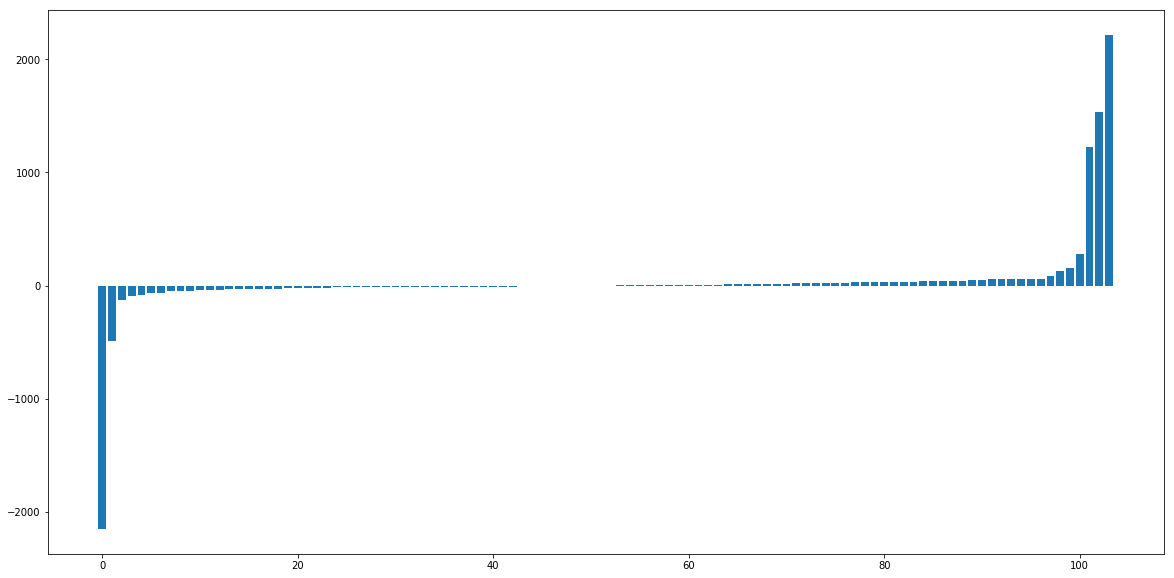

In [44]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10)) # 해당 캔버스를 정한다. figsize로 크기 결정
plt.bar(np.arange(len(lm.coef_)), np.sort(lm.coef_, axis=0))
# bar형 그래프를 그리고, 첫번째가 x 인자(가중치의 개수만큼 인덱스 생성), y값이 데이터를 정렬)
# sort 정렬
# coefficient는 정렬 (열벡터)
# axis = 축이 0이다 축을 열로 하겠다. 

<BarContainer object of 104 artists>

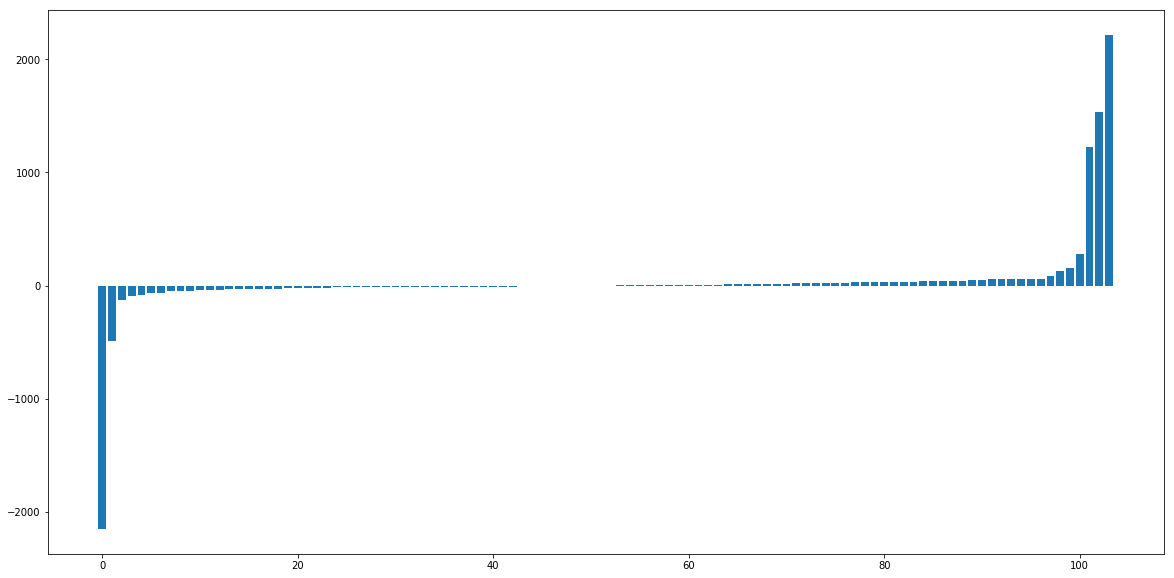

In [26]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(lm.coef_)), np.sort(lm.coef_, axis=0))


# Ridge

In [39]:
Rm = Ridge(alpha=0.1)
# alpha 값의 정확한 의미? : 
Rm.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
Rm.score(X_train, y_train)

0.9261926604874953

In [41]:
Rm.score(X_test, y_test)

0.7463824108919297

<BarContainer object of 104 artists>

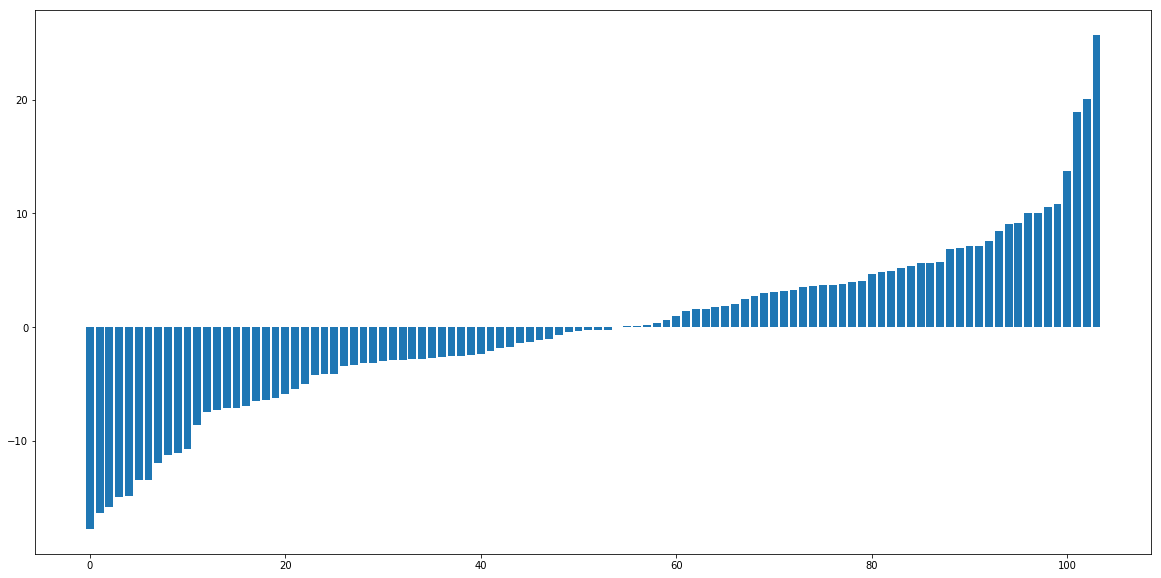

In [42]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(Rm.coef_)), np.sort(Rm.coef_, axis=0))
# 규제에 따라서 machine이 learning이 학습을 다르게 하였다. alpha값에 의해서. 
# for문을 돌려서 최적의 alpha 값을 찾아낼 수 있다.

In [46]:
minimum_score = -100
minimum_alpha = 0
best_model = None
for i in list(range(0, 100, 1)):
    i = i/10
    
    rm = Ridge(alpha=i)
    rm.fit(X_train, y_train)
    
    
    train_score = rm.score(X_train, y_train)
    test_score = rm.score(X_test, y_test)
    print('alpha:{}, train: {}, test: {}'.format(i, train_score, test_score))
    if minimum_score < test_score:
        minimum_score = test_score
        minimum_alpha = i
        best_model = rm

        

alpha:0.0, train: 0.949024096661283, test: 0.61588585839754
alpha:0.1, train: 0.9261926604874953, test: 0.7463824108919297
alpha:0.2, train: 0.9183092048526234, test: 0.7483699744604826
alpha:0.3, train: 0.9123282530642607, test: 0.746069787083119
alpha:0.4, train: 0.9072989000889832, test: 0.7427602446356624
alpha:0.5, train: 0.902879416235023, test: 0.7391528134070406
alpha:0.6, train: 0.8988994292523822, test: 0.735483607189646
alpha:0.7, train: 0.8952587207175312, test: 0.7318475397585713
alpha:0.8, train: 0.8918919158110435, test: 0.7282862105324313
alpha:0.9, train: 0.8887532342331406, test: 0.7248179421659836
alpha:1.0, train: 0.885808929210358, test: 0.7214499108060962
alpha:1.1, train: 0.8830331463662006, test: 0.7181836425473915
alpha:1.2, train: 0.8804054770468998, test: 0.7150177179456932
alpha:1.3, train: 0.8779094238671834, test: 0.7119491844859882
alpha:1.4, train: 0.8755313910021427, test: 0.7089743261797231
alpha:1.5, train: 0.8732599931262279, test: 0.706089094839196


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.12548e-18): result may not be accurate.
  overwrite_a=True).T


In [47]:
best_model

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

<BarContainer object of 104 artists>

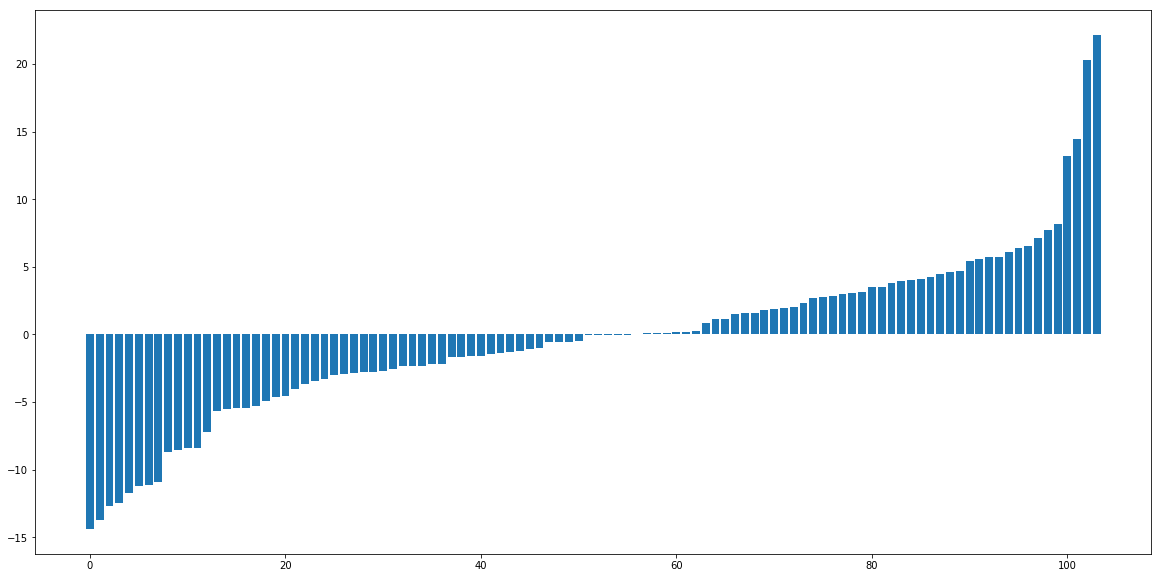

In [48]:
n = np.arange(len(best_model.coef_))

plt.figure(figsize=(20,10))
plt.bar(n, np.sort(best_model.coef_, axis=0))

### 번외. alpha값이 10이라면 어떨까?

In [51]:
rm = Ridge(alpha=10)
rm.fit(X_train, y_train)
    
train_score = rm.score(X_train, y_train)
test_score = rm.score(X_test, y_test)
print('alpha:{}, train: {}, test: {}'.format(10, train_score, test_score))


alpha:10, train: 0.7934484752213662, test: 0.5886807784434769


In [52]:
rm.coef_

array([-8.46596122e-01,  6.98887151e-01, -7.49726146e-01,  3.96192053e-01,
       -7.06694931e-01,  4.39539381e+00, -1.27269906e-01, -2.42262667e+00,
        7.99201321e-01, -1.15243951e+00, -2.42142871e+00,  1.10549698e+00,
       -4.04722530e+00, -6.04302164e-01,  2.58335072e-03, -5.42627287e-01,
        1.42467387e-01, -6.68475786e-01, -7.74903480e-01, -7.85007065e-01,
       -4.30374717e-02, -8.65434158e-01, -7.84519815e-01, -7.03140358e-01,
       -9.01398950e-01, -3.37628833e-01,  1.42580164e+00, -3.75181858e-01,
        5.69651264e-01,  2.20488135e-01,  2.21348500e+00,  8.08756106e-02,
       -2.78410363e-01,  1.06340354e-01, -4.19045695e-01, -4.60997581e-01,
        7.59655147e-01, -7.25234065e-01,  8.30374344e-01,  2.95622158e-01,
       -6.04369784e-01, -7.13193257e-01,  1.76468045e-01, -1.05122606e+00,
        4.92900548e-01,  5.53020330e-01, -4.25085469e-01, -1.86301618e-02,
       -1.38468210e+00,  3.96192053e-01, -6.67255566e-01,  7.77413372e-01,
        3.93261655e-01,  

### cross validation with Ridge

In [53]:
minimum_score = -100
minimum_alpha = 0
best_model = None

cross_mean = -100
cross_alpha = 0
cross_best = None

for i in list(range(0, 100, 1)):
    i = i/10
    
    rm = Ridge(alpha=i)
    rm.fit(X_train, y_train)
    
    
    train_score = rm.score(X_train, y_train)
    test_score = rm.score(X_test, y_test)
    
    print('alpha:{}, train: {}, test: {}'.format(i, train_score, test_score))
    
    if minimum_score < test_score:
        minimum_score = test_score
        minimum_alpha = i
        best_model = rm
    
    # cross validation scores
    cross_scores = cross_val_score(rm, X, y, cv=5)
    # cv로 몇번 cross validation을 할지 결정한다. 
    _cross_mean, _corss_std = cross_scores.mean(), cross_scores.std()
        
    if cross_mean < _cross_mean:
        cross_mean = _cross_mean
        cross_alpha = i
        cross_best = rm



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.12548e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.41362e-19): result may not be accurate.
  overwrite_a=True).T


alpha:0.0, train: 0.949024096661283, test: 0.61588585839754
alpha:0.1, train: 0.9261926604874953, test: 0.7463824108919297
alpha:0.2, train: 0.9183092048526234, test: 0.7483699744604826
alpha:0.3, train: 0.9123282530642607, test: 0.746069787083119
alpha:0.4, train: 0.9072989000889832, test: 0.7427602446356624
alpha:0.5, train: 0.902879416235023, test: 0.7391528134070406
alpha:0.6, train: 0.8988994292523822, test: 0.735483607189646
alpha:0.7, train: 0.8952587207175312, test: 0.7318475397585713
alpha:0.8, train: 0.8918919158110435, test: 0.7282862105324313
alpha:0.9, train: 0.8887532342331406, test: 0.7248179421659836
alpha:1.0, train: 0.885808929210358, test: 0.7214499108060962
alpha:1.1, train: 0.8830331463662006, test: 0.7181836425473915
alpha:1.2, train: 0.8804054770468998, test: 0.7150177179456932
alpha:1.3, train: 0.8779094238671834, test: 0.7119491844859882
alpha:1.4, train: 0.8755313910021427, test: 0.7089743261797231
alpha:1.5, train: 0.8732599931262279, test: 0.706089094839196


In [54]:
cross_best

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
cross_best.score(X_test, y_test)


0.7214499108060962

In [881]:
cross_best.score(X, y)

0.8559341608869707

<BarContainer object of 104 artists>

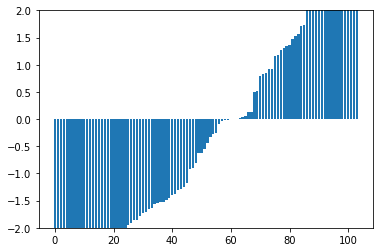

In [57]:
n = np.arange(len(cross_best.coef_))

plt.figure(figsize=(20,20))
plt.ylim(-2,2)
plt.bar(n, np.sort(cross_best.coef_, axis=0))

In [58]:
# 만약 알파값이 늘어나면??
rm = Ridge(alpha=0) # 규제를 하지 않겠다. # linear regression과 똑같다. 
rm1 = Ridge(alpha=0.1)
rm2 = Ridge(alpha=0.5)
rm3 = Ridge(alpha=10)
rm4 = Ridge(alpha=20)

rm4 = Ridge(alpha=40)
rm5 = Ridge(alpha=80)

rm.fit(X_train, y_train)
rm1.fit(X_train, y_train)
rm2.fit(X_train, y_train)
rm3.fit(X_train, y_train)
rm4.fit(X_train, y_train)
rm5.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.12548e-18): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=80, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

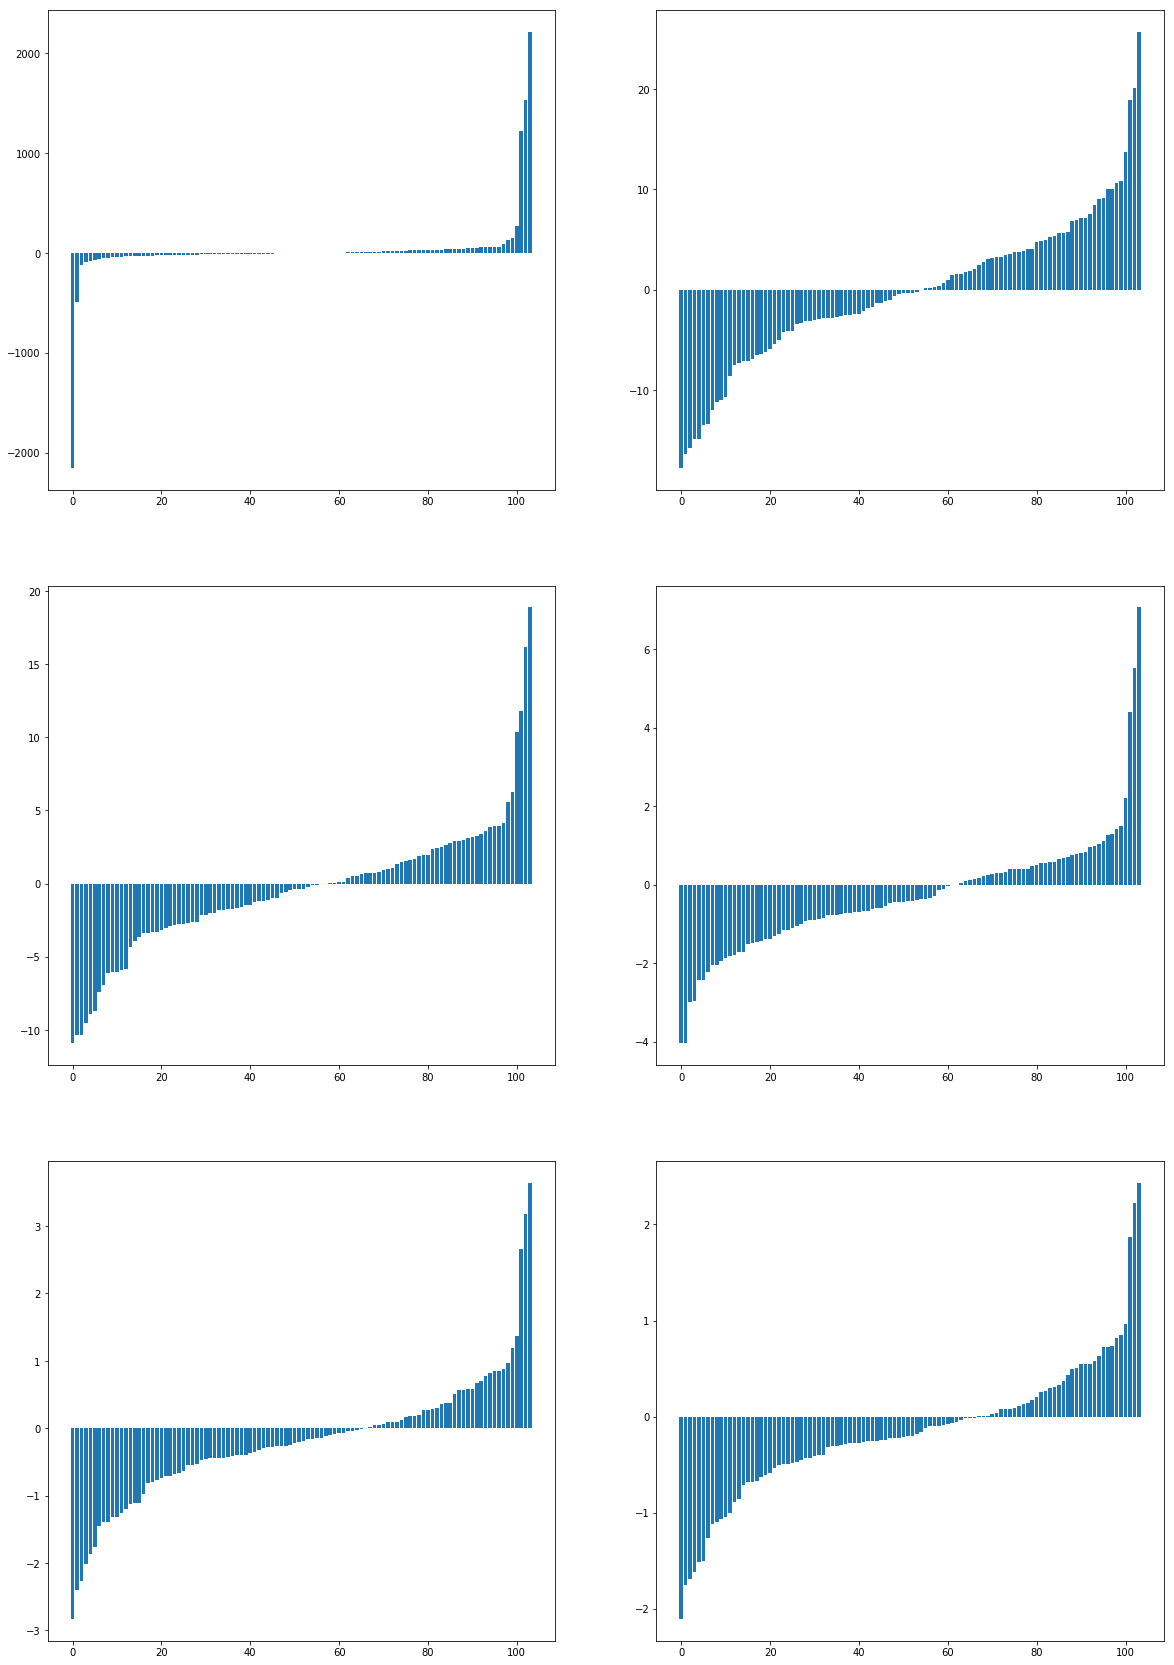

In [59]:
n = np.arange(len(rm.coef_))

plt.figure(figsize=(20,30))
plt.subplot(3,2,1)
plt.bar(n, np.sort(rm.coef_, axis=0))

plt.subplot(3,2,2)
plt.bar(n, np.sort(rm1.coef_, axis=0))

plt.subplot(3,2,3)
plt.bar(n, np.sort(rm2.coef_, axis=0))

plt.subplot(3,2,4)
plt.bar(n, np.sort(rm3.coef_, axis=0))

plt.subplot(3,2,5)
plt.bar(n, np.sort(rm4.coef_, axis=0))

plt.subplot(3,2,6)
plt.bar(n, np.sort(rm5.coef_, axis=0))
plt.show()

[-1.20749107e+02 -1.64138664e+01 -8.72351634e+01  1.13755799e+15
  1.39174604e+01  6.67066148e+01  4.39237101e+01 -2.70647217e+01
  1.00697987e+01  3.68315727e+01  2.30973764e+00  4.04255682e+01
  2.38833445e+01  1.98294236e+01  3.15798140e+02  8.93503844e+02
  1.64942284e+02 -5.59653980e+01  3.03638591e+01 -3.58519000e+01
 -2.89937352e+01  5.60229292e+02 -1.24811933e+03  1.49494363e+02
 -1.17022294e+01  7.04693451e+01 -3.93167147e+00 -8.68973269e+00
 -4.81423854e+00 -5.04012182e+01  7.97075202e+00  5.74038059e+00
 -1.26671336e+01 -1.13609590e+01  3.61227816e+01  3.95924284e-01
  2.24280866e+01 -3.43147328e+01  3.46222176e+01 -1.13220033e+00
  6.25640059e+00  4.25872889e+01  1.25017991e+01  4.88600320e+01
 -9.90547674e+00  1.18900310e+01  5.95835026e+00  1.76647847e+01
 -1.90994247e+01 -1.13755799e+15 -6.72219507e+00 -3.22139764e+01
  3.93843878e+00  1.71373913e+01 -2.80867558e+00  2.44173668e+00
 -1.00731895e+01  4.39818133e+01 -1.24014399e+01 -5.69159172e+00
 -4.79704406e-01 -1.50838

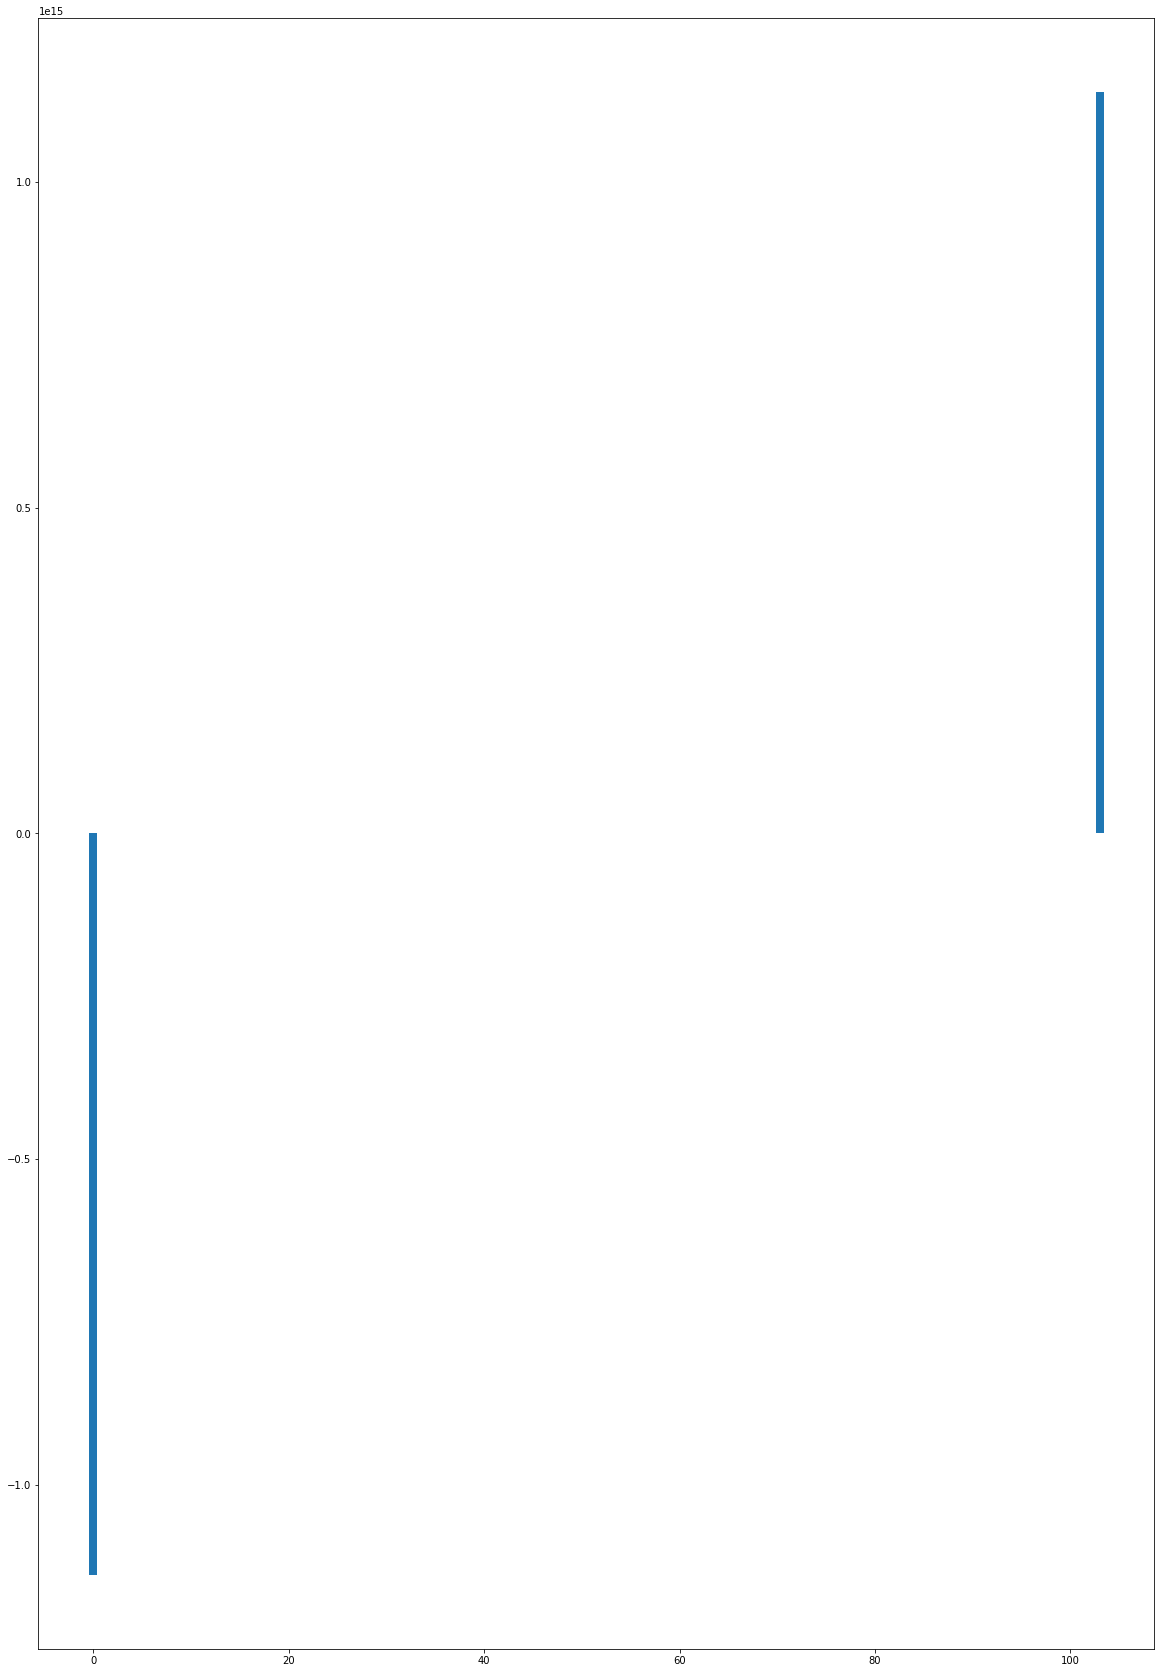

In [947]:
plt.figure(figsize=(20,30))
plt.bar(n, np.sort(rm.coef_, axis=0))

print(rm.coef_)

# Lasso

In [60]:
rm = Lasso(alpha=.1)
rm.fit(X_train, y_train)
    
train_score = rm.score(X_train, y_train)
test_score = rm.score(X_test, y_test)
print('alpha:{}, train: {}, test: {}'.format(0.1, train_score, test_score))


alpha:0.1, train: 0.7734670612352095, test: 0.5788369599709589


In [61]:
minimum_score = -100
minimum_alpha = 0
best_model = None
for i in list(range(0, 100, 1)):
    i = i/10
    
    lasso_model = Lasso(alpha=i)
    lasso_model.fit(X_train, y_train)
    
    
    train_score = lasso_model.score(X_train, y_train)
    test_score = lasso_model.score(X_test, y_test)
    print('alpha:{}, train: {}, test: {}'.format(i, train_score, test_score))
    if minimum_score < test_score:
        minimum_score = test_score
        minimum_alpha = i
        best_model = lasso_model


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha:0.0, train: 0.939503285870033, test: 0.690188038527979
alpha:0.1, train: 0.7734670612352095, test: 0.5788369599709589
alpha:0.2, train: 0.741706960113871, test: 0.548860731870187
alpha:0.3, train: 0.711305923952956, test: 0.5260288993761577
alpha:0.4, train: 0.6701047347406606, test: 0.4933276410317631
alpha:0.5, train: 0.6179416874902637, test: 0.4479702469409994
alpha:0.6, train: 0.5553606674106111, test: 0.38911618397709524
alpha:0.7, train: 0.49320860275008227, test: 0.33597460514957855
alpha:0.8, train: 0.42453929924611256, test: 0.2786313295595215
alpha:0.9, train: 0.35895973077606713, test: 0.22575931592355825
alpha:1.0, train: 0.30173392764195583, test: 0.18559880937915907
alpha:1.1, train: 0.23937088149562025, test: 0.14032096432643604
alpha:1.2, train: 0.17106794012348725, test: 0.09027094180483342
alpha:1.3, train: 0.11186464241587157, test: 0.05262631982712018
alpha:1.4, train: 0.0695646489255729, test: 0.034841562341824894
alpha:1.5, train: 0.037261341223732924, test

In [62]:
best_model

Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### cross validation with Lasso

In [73]:
lm = LinearRegression()
cross_scores = cross_val_score(lm, X,  y, cv=5)
cross_scores
# score는 cross validation에 대한 스코어. 테스트 셋에 대한 스코어. 

array([ 0.17270014, -2.24553502,  0.64430017,  0.22441297, -7.95698209])

In [64]:
minimum_score = -100
minimum_alpha = 0
best_model = None

cross_mean = -100
cross_alpha = 0
cross_best = None

for i in list(range(0, 100, 1)):
    i = i/10
    
    lm = Lasso(alpha=i)
    lm.fit(X_train, y_train)
    
    
    train_score = lm.score(X_train, y_train)
    test_score = lm.score(X_test, y_test)
    
    print('alpha:{}, train: {}, test: {}'.format(i, train_score, test_score))
    
    if minimum_score < test_score:
        minimum_score = test_score
        minimum_alpha = i
        best_model = lm
    
    # cross validation scores
    cross_scores = cross_val_score(rm, X, y, cv=5)
    _cross_mean, _corss_std = cross_scores.mean(), cross_scores.std()
        
    if cross_mean < _cross_mean:
        # 평균 값을ㅇ 비교함으로써 가장 좋은 것을 찾아낸다. 
        cross_mean = _cross_mean
        cross_alpha = i
        cross_best = lm



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha:0.0, train: 0.939503285870033, test: 0.690188038527979
alpha:0.1, train: 0.7734670612352095, test: 0.5788369599709589
alpha:0.2, train: 0.741706960113871, test: 0.548860731870187
alpha:0.3, train: 0.711305923952956, test: 0.5260288993761577
alpha:0.4, train: 0.6701047347406606, test: 0.4933276410317631
alpha:0.5, train: 0.6179416874902637, test: 0.4479702469409994
alpha:0.6, train: 0.5553606674106111, test: 0.38911618397709524
alpha:0.7, train: 0.49320860275008227, test: 0.33597460514957855
alpha:0.8, train: 0.42453929924611256, test: 0.2786313295595215
alpha:0.9, train: 0.35895973077606713, test: 0.22575931592355825
alpha:1.0, train: 0.30173392764195583, test: 0.18559880937915907
alpha:1.1, train: 0.23937088149562025, test: 0.14032096432643604
alpha:1.2, train: 0.17106794012348725, test: 0.09027094180483342
alpha:1.3, train: 0.11186464241587157, test: 0.05262631982712018
alpha:1.4, train: 0.0695646489255729, test: 0.034841562341824894
alpha:1.5, train: 0.037261341223732924, test

In [65]:
cross_best.score(X_test, y_test)

0.690188038527979

<BarContainer object of 104 artists>

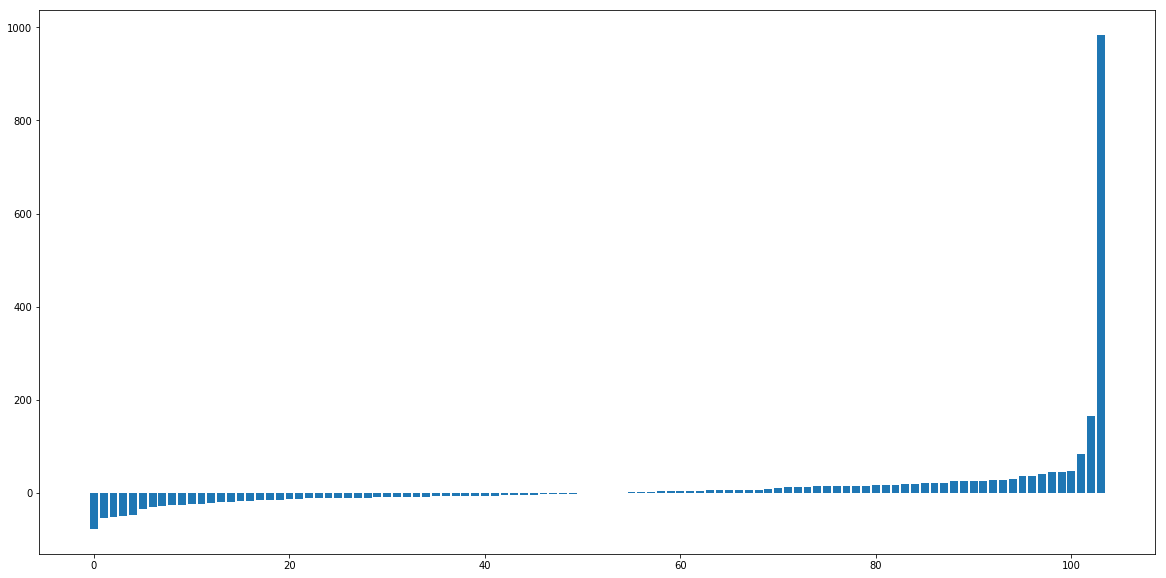

In [66]:
cross_best.score(X_test, y_test)
n = np.arange(len(cross_best.coef_))

plt.figure(figsize=(20,10))
plt.bar(n, np.sort(cross_best.coef_, axis=0))

In [67]:
# 만약 알파값이 늘어나면??
lm = Lasso(alpha=0)
lm1 = Lasso(alpha=.1)
lm2 = Lasso(alpha=.5)
lm3 = Lasso(alpha=1)
lm4 = Lasso(alpha=2)
lm5 = Lasso(alpha=4)
lm6 = Lasso(alpha=8)
# 이런식으로 변화한다는 것을 보여주기 위해서. 
# 0.001 이나 0.0001 은 유의미한 결과가 나오지 않기 때문에 의미가 크게 없다고 볼 수 있다.


lm.fit(X_train, y_train)
lm1.fit(X_train, y_train)
lm2.fit(X_train, y_train)
lm3.fit(X_train, y_train)
lm4.fit(X_train, y_train)
lm5.fit(X_train, y_train)
lm6.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=8, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

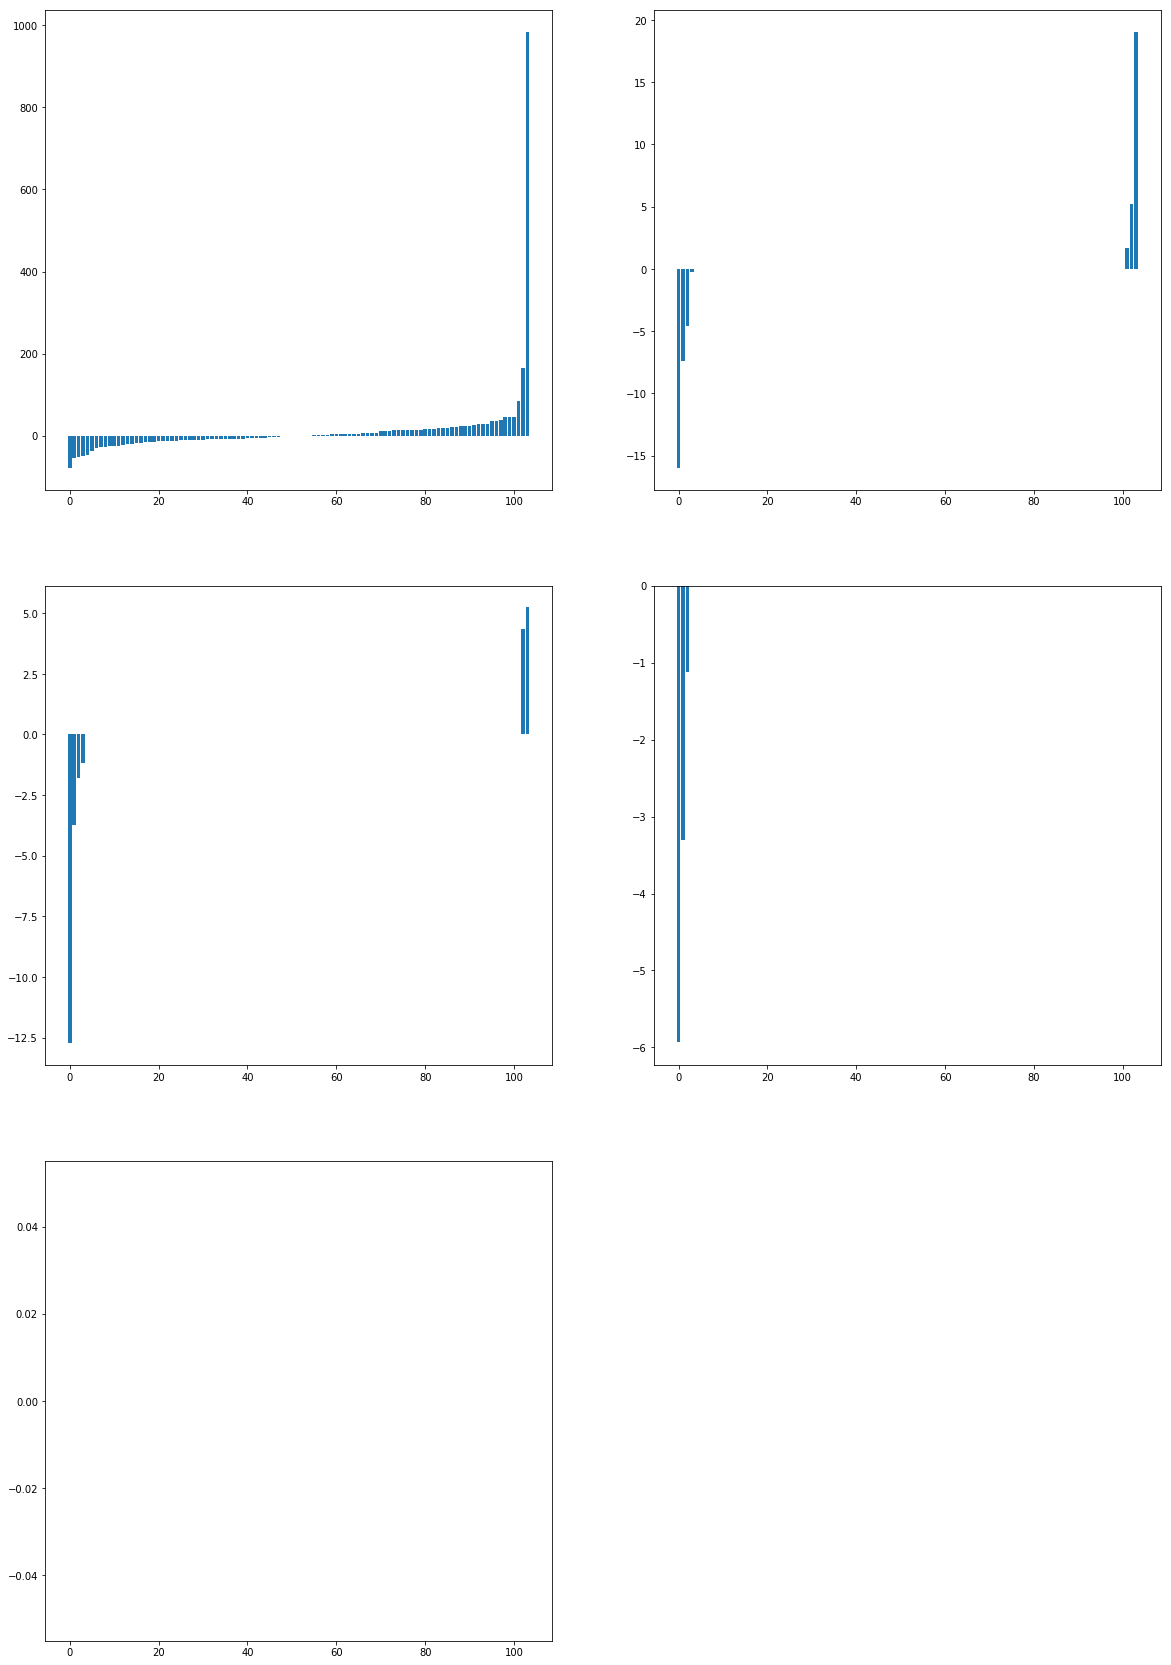

In [68]:
n = np.arange(len(lm.coef_))

plt.figure(figsize=(20,30))
plt.subplot(3,2,1)
plt.bar(n, np.sort(lm.coef_, axis=0))

plt.subplot(3,2,2)
plt.bar(n, np.sort(lm1.coef_, axis=0))

plt.subplot(3,2,3)
plt.bar(n, np.sort(lm2.coef_, axis=0))

plt.subplot(3,2,4)
plt.bar(n, np.sort(lm3.coef_, axis=0))

plt.subplot(3,2,5)
plt.bar(n, np.sort(lm4.coef_, axis=0))
plt.show()

In [69]:
lm6.coef_
# 기울기를 낮추다가 아예 0으로 만들어버린다.

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,
       -0.,  0., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,
       -0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.])

In [70]:
_list = []
for x in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=x)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    _list.append((abs(lm.score(X_train, y_train) - lm.score(X_test, y_test)), x))



In [71]:
_list

[(0.3331382382534058, 0),
 (0.014780290152900277, 1),
 (0.03322895614872434, 2),
 (0.07049759812203349, 3),
 (0.09560605475778738, 4),
 (0.06206250958523918, 5),
 (0.3013343958777175, 6),
 (0.31578747159858356, 7),
 (0.08792445140745286, 8),
 (0.05794836731729802, 9),
 (0.056925667537319535, 10),
 (0.13999401012461166, 11),
 (0.12860870139434477, 12),
 (0.08938436240001724, 13),
 (0.19090361201127304, 14),
 (0.06723936454673496, 15),
 (0.14388613037135278, 16),
 (0.13044390855808674, 17),
 (0.14203326859368937, 18),
 (0.13981945082850067, 19),
 (0.26775876245783303, 20),
 (0.11282664948694499, 21),
 (0.23012258126270546, 22),
 (0.21978868281696085, 23),
 (0.2828286930975835, 24),
 (0.0847895652359939, 25),
 (0.16893154978573688, 26),
 (0.10663737797751016, 27),
 (0.1878726205592276, 28),
 (0.13547541105791283, 29),
 (0.1257065945364364, 30),
 (0.06872704310250355, 31),
 (0.037324270180781216, 32),
 (0.06225102223223189, 33),
 (0.046319938312373465, 34),
 (0.10984313393058787, 35),
 (0.

In [ ]:
lm = Linear